## Read the created tidy dataset 

In [1]:
df <- read.table("featuresextracted.csv", header= TRUE, stringsAsFactors = FALSE, sep=",")

In [2]:
head(df)

,activity,sex,meanx,meany,meanz,skewx,skewy,skewz,kurtx,kurty,kurtz,corxy,coryz,corxz,e1,e2,e3
1,standup_chair,1,-3.577941,3.19708,7.293908,-0.02743029,0.1256692,-0.1331527,1.116679,1.511332,1.18265,-0.9221761,-0.9025038,0.9702177,443.5277,266.0947,423.7009
2,sitdown_chair,1,-3.164217,4.258892,6.826107,-0.1194712,0.5794308,-0.1097923,1.106795,3.38443,1.248554,0.6679544,0.6425899,0.96022,472.6722,239.3231,372.4055
3,pour_water,1,0.7739084,0.8936094,8.676544,0.4834989,-0.2466208,0.5049835,2.338528,1.282156,3.489376,0.7461314,0.1828762,0.1979201,154.1541,264.91,217.2445
4,drink_glass,1,2.300959,3.311903,8.927909,0.4539398,-0.8603673,0.2220048,1.78886,2.139986,3.773488,-0.8746166,0.007853708,-0.06172179,114.9052,155.6867,143.5032
5,drink_glass,1,2.541931,3.663932,8.580743,0.2279045,-0.7378359,-1.342537,3.249835,2.044912,14.14306,-0.8632525,-0.2465573,0.2792758,174.865,211.0282,192.7282
6,standup_chair,1,-5.170489,5.108228,5.11284,0.9050761,0.9603296,0.6652821,1.96315,3.165712,1.744554,0.8518449,0.858185,0.956636,402.6098,216.1527,250.1744


In [3]:
# drop sex
df$sex <- NULL

In [4]:
str(df)

'data.frame':	839 obs. of  16 variables:
 $ activity: chr  "standup_chair" "sitdown_chair" "pour_water" "drink_glass" ...
 $ meanx   : num  -3.578 -3.164 0.774 2.301 2.542 ...
 $ meany   : num  3.197 4.259 0.894 3.312 3.664 ...
 $ meanz   : num  7.29 6.83 8.68 8.93 8.58 ...
 $ skewx   : num  -0.0274 -0.1195 0.4835 0.4539 0.2279 ...
 $ skewy   : num  0.126 0.579 -0.247 -0.86 -0.738 ...
 $ skewz   : num  -0.133 -0.11 0.505 0.222 -1.343 ...
 $ kurtx   : num  1.12 1.11 2.34 1.79 3.25 ...
 $ kurty   : num  1.51 3.38 1.28 2.14 2.04 ...
 $ kurtz   : num  1.18 1.25 3.49 3.77 14.14 ...
 $ corxy   : num  -0.922 0.668 0.746 -0.875 -0.863 ...
 $ coryz   : num  -0.9025 0.64259 0.18288 0.00785 -0.24656 ...
 $ corxz   : num  0.9702 0.9602 0.1979 -0.0617 0.2793 ...
 $ e1      : num  444 473 154 115 175 ...
 $ e2      : num  266 239 265 156 211 ...
 $ e3      : num  424 372 217 144 193 ...


## Combining classes

In [5]:
df$activity[df$activity=="liedown_bed"] <- "bed_liedown_getup"

In [6]:
df$activity[df$activity=="getup_bed"] <- "bed_liedown_getup"

In [7]:
df$activity[df$activity=="eat_meat"] <- "eat"

In [8]:
df$activity[df$activity=="eat_soup"] <- "eat"

In [9]:
df$activity[df$activity=="standup_chair"] <- "chair_standup_sitdown"

In [10]:
df$activity[df$activity=="sitdown_chair"] <- "chair_standup_sitdown"

In [12]:
df$activity <- as.factor(df$activity)

In [13]:
require(caret)

Loading required package: caret
Loading required package: lattice
Loading required package: ggplot2


In [14]:
str(df)

'data.frame':	839 obs. of  16 variables:
 $ activity: Factor w/ 11 levels "bed_liedown_getup",..: 3 3 9 7 7 3 3 9 7 9 ...
 $ meanx   : num  -3.578 -3.164 0.774 2.301 2.542 ...
 $ meany   : num  3.197 4.259 0.894 3.312 3.664 ...
 $ meanz   : num  7.29 6.83 8.68 8.93 8.58 ...
 $ skewx   : num  -0.0274 -0.1195 0.4835 0.4539 0.2279 ...
 $ skewy   : num  0.126 0.579 -0.247 -0.86 -0.738 ...
 $ skewz   : num  -0.133 -0.11 0.505 0.222 -1.343 ...
 $ kurtx   : num  1.12 1.11 2.34 1.79 3.25 ...
 $ kurty   : num  1.51 3.38 1.28 2.14 2.04 ...
 $ kurtz   : num  1.18 1.25 3.49 3.77 14.14 ...
 $ corxy   : num  -0.922 0.668 0.746 -0.875 -0.863 ...
 $ coryz   : num  -0.9025 0.64259 0.18288 0.00785 -0.24656 ...
 $ corxz   : num  0.9702 0.9602 0.1979 -0.0617 0.2793 ...
 $ e1      : num  444 473 154 115 175 ...
 $ e2      : num  266 239 265 156 211 ...
 $ e3      : num  424 372 217 144 193 ...


### Reduced to 11 classes.

## Model building

In [15]:
set.seed(11226)

In [41]:
str(df)

'data.frame':	839 obs. of  16 variables:
 $ activity: Factor w/ 11 levels "bed_liedown_getup",..: 3 3 9 7 7 3 3 9 7 9 ...
 $ meanx   : num  -3.578 -3.164 0.774 2.301 2.542 ...
 $ meany   : num  3.197 4.259 0.894 3.312 3.664 ...
 $ meanz   : num  7.29 6.83 8.68 8.93 8.58 ...
 $ skewx   : num  -0.0274 -0.1195 0.4835 0.4539 0.2279 ...
 $ skewy   : num  0.126 0.579 -0.247 -0.86 -0.738 ...
 $ skewz   : num  -0.133 -0.11 0.505 0.222 -1.343 ...
 $ kurtx   : num  1.12 1.11 2.34 1.79 3.25 ...
 $ kurty   : num  1.51 3.38 1.28 2.14 2.04 ...
 $ kurtz   : num  1.18 1.25 3.49 3.77 14.14 ...
 $ corxy   : num  -0.922 0.668 0.746 -0.875 -0.863 ...
 $ coryz   : num  -0.9025 0.64259 0.18288 0.00785 -0.24656 ...
 $ corxz   : num  0.9702 0.9602 0.1979 -0.0617 0.2793 ...
 $ e1      : num  444 473 154 115 175 ...
 $ e2      : num  266 239 265 156 211 ...
 $ e3      : num  424 372 217 144 193 ...


In [45]:
trainIndex2 <- createDataPartition(df$activity, p=0.7, list=FALSE)

In [46]:
training <- df[trainIndex2,]

In [47]:
testing <- df[-trainIndex2,]


In [44]:
dim(testing)
dim(training)

[1] 173  16

[1] 592  16

In [48]:
rfmodel <- train(activity~., data=training, method="rf")

In [60]:
#gbmmodel <- train(activity~., data=training, method="gbm")

In [50]:
rfpredict <- predict(rfmodel, testing)

In [51]:
gbmpredict <- predict(gbmmodel, testing)

In [52]:
rfconfusion <- confusionMatrix(rfpredict, testing$activity)

In [53]:
gbmconfusion <- confusionMatrix(gbmpredict, testing$activity)

In [54]:
rfconfusion$overall

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
  8.704453e-01   8.478625e-01   8.220545e-01   9.096695e-01   2.429150e-01 
AccuracyPValue  McnemarPValue 
  1.823080e-96            NaN

In [55]:
gbmconfusion$overall

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
  8.744939e-01   8.521444e-01   8.266057e-01   9.131082e-01   2.429150e-01 
AccuracyPValue  McnemarPValue 
  8.650478e-98            NaN

In [56]:
dfconfusion <- as.data.frame(rfconfusion$table)
dim(dfconfusion)

[1] 121   3

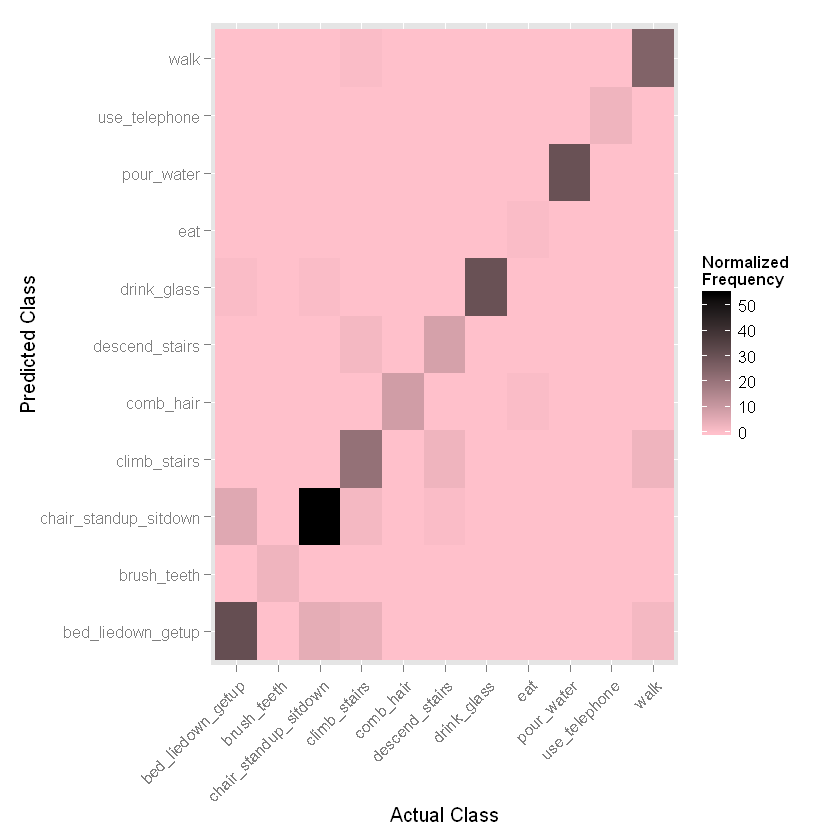

In [57]:
plot <- ggplot(dfconfusion)
plot + geom_tile(aes(x=Reference, y=Prediction, fill=Freq)) + scale_x_discrete(name="Actual Class") + scale_y_discrete(name="Predicted Class") + scale_fill_gradient(low="pink",high="black")+
 theme(axis.text.x = element_text(angle = 45, hjust = 1))+ labs(fill="Normalized\nFrequency")

In [58]:
dfconfusion <- as.data.frame(gbmconfusion$table)
dim(dfconfusion)

[1] 121   3

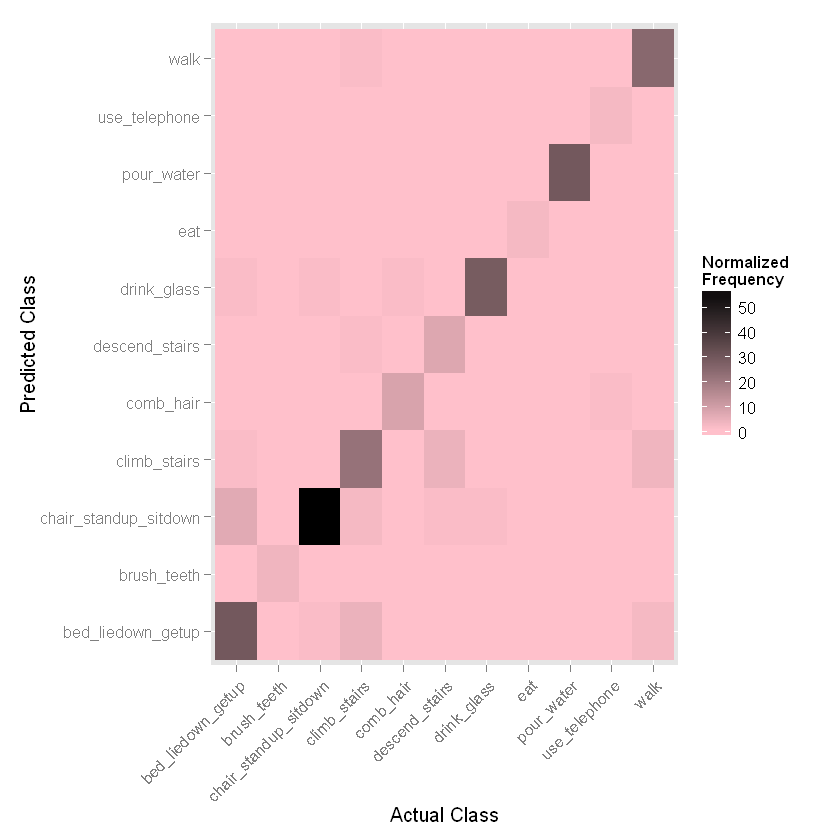

In [59]:
plot <- ggplot(dfconfusion)
plot + geom_tile(aes(x=Reference, y=Prediction, fill=Freq)) + scale_x_discrete(name="Actual Class") + scale_y_discrete(name="Predicted Class") + scale_fill_gradient(low="pink",high="black")+
 theme(axis.text.x = element_text(angle = 45, hjust = 1))+ labs(fill="Normalized\nFrequency")

## Close to 87% accuracy

To DO: More features?
More models?